In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import cv2

## Load Data

In [2]:
data_dir = 'data'

In [3]:
os.listdir(f'{data_dir}')

['pop',
 '.DS_Store',
 'metal',
 'disco',
 'blues',
 'reggae',
 'classical',
 'rock',
 'hiphop',
 '.ipynb_checkpoints',
 'country',
 'jazz']

In [4]:
print(list(os.listdir(os.path.join(f'{data_dir}', 'blues'))))

['blues00009.png', 'blues00035.png', 'blues00021.png', 'blues00020.png', 'blues00034.png', 'blues00008.png', 'blues00022.png', 'blues00036.png', 'blues00037.png', 'blues00023.png', 'blues00027.png', 'blues00033.png', 'blues00032.png', 'blues00026.png', 'blues00030.png', 'blues00024.png', 'blues00018.png', 'blues00019.png', 'blues00025.png', 'blues00031.png', 'blues00095.png', 'blues00081.png', 'blues00056.png', 'blues00042.png', 'blues00043.png', 'blues00057.png', 'blues00080.png', 'blues00094.png', 'blues00082.png', 'blues00096.png', 'blues00069.png', 'blues00041.png', 'blues00055.png', 'blues00054.png', 'blues00040.png', 'blues00068.png', 'blues00097.png', 'blues00083.png', 'blues00087.png', 'blues00093.png', 'blues00044.png', 'blues00050.png', 'blues00078.png', 'blues00079.png', 'blues00051.png', 'blues00045.png', 'blues00092.png', 'blues00086.png', 'blues00090.png', 'blues00084.png', 'blues00053.png', 'blues00047.png', 'blues00046.png', 'blues00052.png', 'blues00085.png', 'blues000

In [5]:
# Automatically loads in images and treats each as a different class by labeling
data = tf.keras.utils.image_dataset_from_directory('data')

Found 999 files belonging to 10 classes.


In [6]:
# Converts Tensorflow dataset into numpy arrays and allows you to iterate over
data_iterator = data.as_numpy_iterator()

In [7]:
# Fetching batch of images 
batch = data_iterator.next()

In [8]:
images, labels = batch

# 32 images, height, width, channels
print(images.shape)

#32 labels for each image
print(labels.shape)

(32, 256, 256, 3)
(32,)


In [9]:
batch[1]

array([6, 8, 3, 0, 5, 7, 3, 7, 0, 6, 0, 5, 1, 7, 6, 2, 6, 9, 2, 3, 0, 6,
       5, 7, 9, 0, 2, 7, 8, 5, 7, 7], dtype=int32)

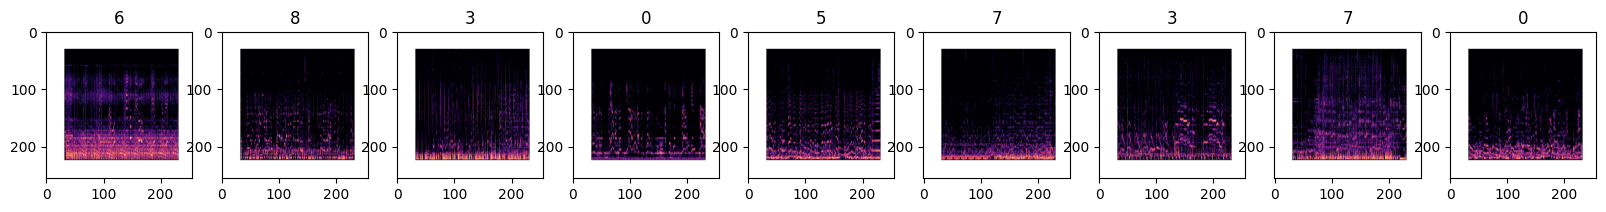

In [10]:
fig, ax = plt.subplots(ncols=9, figsize=(20,20))
for idx, img in enumerate(batch[0][:9]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

## Data Preprocessing

### Scaled images to between 0 and 1

In [26]:
scaled_data = data.map(lambda x, y: (x/255, y))

In [28]:
from sklearn.utils import shuffle
scaled_data = shuffle(scaled_data)

TypeError: '_MapDataset' object is not subscriptable

In [29]:
# scaled_data.as_numpy_iterator().next()[0]

### Split into training, validation, and test sets

In [20]:
train_size = int(len(data) *.7)
val_size = int(len(data) *.2)
test_size = int(len(data) *.1)+1

In [22]:
print(train_size + val_size+ test_size)
print(len(data))

32
32


In [ ]:
train_data = scaled_data.take(train_size)
val_data = scaled_data.skip(train_size).take(val_size)
test_data = scaled_data.skip(train_size + val_size).take(test_size)

### Convert labels to one-hot encoded vectors

## Building CNN

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


In [24]:
model = Sequential()